#**KDD Cup 1999 Data using Autoencoders**

##Importing libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

##Data Collection

In [2]:
# add the column labels
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])
df_train=pd.read_csv('KDDTrain+.txt',header=None,names=columns)
df_test=pd.read_csv('KDDTest+.txt',header=None,names=columns)

##Data Preprocessing

In [3]:
df_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [4]:
#Finding the number of null values
df_train.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [5]:
#Couting the number of 'attacks'
df_train['attack'].value_counts()

,count
attack,
normal,67343
neptune,41214
satan,3633
ipsweep,3599
portsweep,2931
smurf,2646
nmap,1493
back,956
teardrop,892


In [6]:
df_train.attack=df_train.attack.apply(lambda x: 0 if x == 'normal' else 1)

In [7]:
df_test.attack=df_test.attack.apply(lambda x: 0 if x == 'normal' else 1)

In [8]:
df_test['attack'].value_counts()

,count
attack,
1,12833
0,9711


In [9]:
#Label Encoding
def label_encoding(df):
    for column in df.columns:
        if df[column].dtype == object:
            encoded = LabelEncoder()

            encoded.fit(df[column])
            df[column] = encoded.transform(df[column])
    return df

In [10]:
label_encoding(df_train)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,1,20,9,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0,20
1,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0,15
2,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,19
3,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0,21
4,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,49,5,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1,20
125969,8,2,49,9,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0,21
125970,0,1,54,9,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,0,18
125971,0,1,30,5,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,20


In [11]:
label_encoding(df_test)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,1,45,1,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1,21
1,0,1,45,1,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1,21
2,2,1,19,9,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,0,21
3,0,0,13,9,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,1,15
4,1,1,55,2,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,1,49,9,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,0,21
22540,0,1,22,9,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,0,21
22541,0,1,22,9,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,1,15
22542,0,2,11,9,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,0,21


In [12]:
#Data Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train = pd.DataFrame(scaler.fit_transform(df_train), columns=df_train.columns)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_test = pd.DataFrame(scaler.fit_transform(df_test), columns=df_test.columns)

In [14]:
df_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0.000000,0.5,0.714286,0.1,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1.0,1.000000
1,0.000000,0.5,0.714286,0.1,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1.0,1.000000
2,0.000035,0.5,0.301587,0.9,2.066513e-04,0.000000,0.0,0.0,0.0,0.000000,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,0.0,1.000000
3,0.000000,0.0,0.206349,0.9,3.183413e-07,0.000000,0.0,0.0,0.0,0.000000,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,1.0,0.714286
4,0.000017,0.5,0.873016,0.2,0.000000e+00,0.000011,0.0,0.0,0.0,0.000000,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,1.0,0.523810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.000000,0.5,0.777778,0.9,1.263815e-05,0.000247,0.0,0.0,0.0,0.000000,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,0.0,1.000000
22540,0.000000,0.5,0.349206,0.9,5.045710e-06,0.000697,0.0,0.0,0.0,0.000000,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,0.0,1.000000
22541,0.000000,0.5,0.349206,0.9,8.681168e-04,0.006177,0.0,0.0,0.0,0.019802,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,1.0,0.714286
22542,0.000000,1.0,0.174603,0.9,6.685168e-07,0.000031,0.0,0.0,0.0,0.000000,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,0.0,1.000000


In [15]:
df_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0.000000,0.5,0.289855,0.9,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0.0,0.952381
1,0.000000,1.0,0.637681,0.9,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0.0,0.714286
2,0.000000,0.5,0.710145,0.5,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1.0,0.904762
3,0.000000,0.5,0.347826,0.9,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0.0,1.000000
4,0.000000,0.5,0.347826,0.9,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.000000,0.5,0.710145,0.5,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1.0,0.952381
125969,0.000186,1.0,0.710145,0.9,7.608895e-08,1.106923e-07,0.0,0.0,0.0,0.0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.0,1.000000
125970,0.000000,0.5,0.782609,0.9,1.616709e-06,2.931438e-07,0.0,0.0,0.0,0.0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,0.0,0.857143
125971,0.000000,0.5,0.434783,0.5,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1.0,0.952381


In [16]:
df_train['attack'].value_counts()

,count
attack,
0.0,67343
1.0,58630


In [17]:
import plotly.express as px

count = df_train['attack'].value_counts()
fig = px.bar(count, x=count.index, y=count.values)

# Add axis labels and a title
fig.update_layout(
    xaxis_title='Category',
    yaxis_title='Count',
    title='Bar Plot of attacks types'
)

# Show the plot
fig.show()

##Training the Model

In [18]:
normal_data = df_train[df_train['attack'] == 0]
abnormal_data = df_train[df_train['attack'] == 1]

In [19]:
# Select X_train as the normal instances only
X_train = normal_data.drop('attack', axis=1)

In [20]:
X_test = df_test.drop('attack',axis=1)

In [21]:
X_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
0,0.000000,0.5,0.714286,0.1,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,...,0.039216,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1.000000
1,0.000000,0.5,0.714286,0.1,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,...,0.003922,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1.000000
2,0.000035,0.5,0.301587,0.9,2.066513e-04,0.000000,0.0,0.0,0.0,0.000000,...,0.337255,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,1.000000
3,0.000000,0.0,0.206349,0.9,3.183413e-07,0.000000,0.0,0.0,0.0,0.000000,...,0.223529,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,0.714286
4,0.000017,0.5,0.873016,0.2,0.000000e+00,0.000011,0.0,0.0,0.0,0.000000,...,0.337255,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,0.523810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.000000,0.5,0.777778,0.9,1.263815e-05,0.000247,0.0,0.0,0.0,0.000000,...,0.552941,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,1.000000
22540,0.000000,0.5,0.349206,0.9,5.045710e-06,0.000697,0.0,0.0,0.0,0.000000,...,1.000000,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,1.000000
22541,0.000000,0.5,0.349206,0.9,8.681168e-04,0.006177,0.0,0.0,0.0,0.019802,...,1.000000,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,0.714286
22542,0.000000,1.0,0.174603,0.9,6.685168e-07,0.000031,0.0,0.0,0.0,0.000000,...,0.988235,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,1.000000


In [22]:
normal_data.shape[1]

43

In [23]:
from tensorflow.keras.models import Model
n_features= normal_data.shape[1]-1
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(128, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(32, activation="relu")])

    self.decoder = tf.keras.Sequential([
      layers.Dense(64, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(n_features, activation="linear")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [24]:
from keras.layers import Input, Dense
from keras.models import Model

n_features = normal_data.shape[1]-1
# Define the input shape
input_shape = (n_features,)

# Define the encoder architecture
input_layer = Input(shape=input_shape)
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

# Define the decoder architecture
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
output_layer = Dense(n_features, activation='linear')(decoded)

# Define the autoencoder model
autoencoder = Model(input_layer, output_layer)

In [25]:
autoencoder.compile(optimizer='adam', loss='mse')

In [26]:
history= autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_split=0.2)

Epoch 1/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0281 - val_loss: 9.9262e-04
Epoch 2/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 7.7579e-04 - val_loss: 4.6357e-04
Epoch 3/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 3.8308e-04 - val_loss: 2.9516e-04
Epoch 4/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2.4856e-04 - val_loss: 2.2468e-04
Epoch 5/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.9527e-04 - val_loss: 1.9144e-04
Epoch 6/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.6179e-04 - val_loss: 1.7252e-04
Epoch 7/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.4310e-04 - val_loss: 1.3613e-04
Epoch 8/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 1.1758e-04 - val_loss: 1.2488e-04
Epoch 9/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0435e-04 - val_loss: 1.1001e-04
Epoch 10/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9.4040e-05 - val_loss: 8.1462e-05
Epoch 11/50
421/421 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 8.

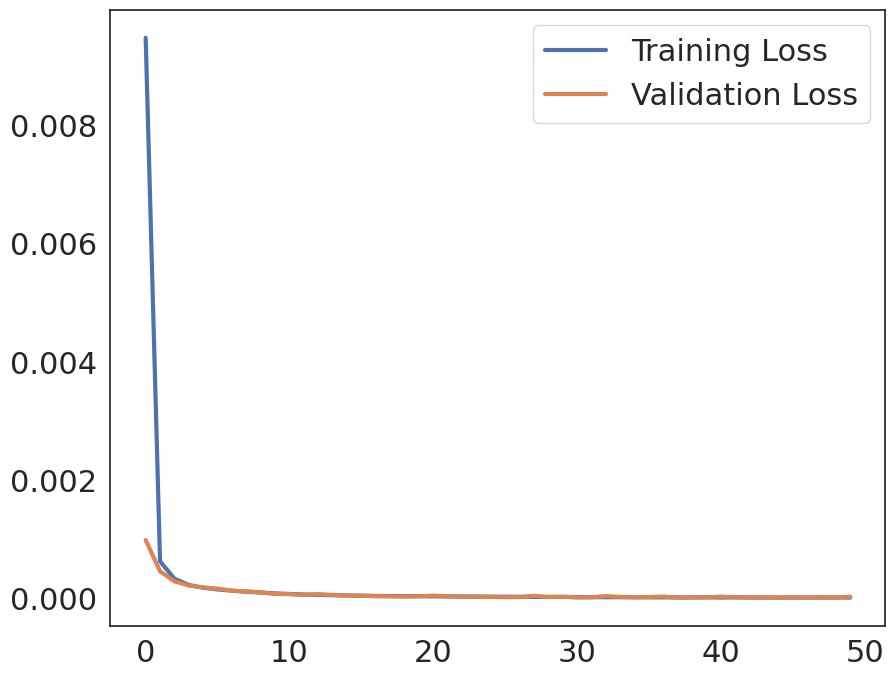

In [27]:
plt.figure(figsize=(10,8))
sns.set(font_scale = 2)
sns.set_style("white")
plt.plot(history.history["loss"], label="Training Loss",linewidth=3.0)
plt.plot(history.history["val_loss"], label="Validation Loss",linewidth=3.0)
plt.legend()

In [28]:
loss = autoencoder.evaluate(X_test, X_test)

705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0018


In [29]:
print(loss)

0.0017692729597911239


In [30]:
# Create the encoder model
encoder_input = autoencoder.input
encoder_output = autoencoder.layers[3].output
encoder_model = Model(encoder_input, encoder_output)

In [31]:
encoded_X_train = encoder_model.predict(X_train)
decoded_X_train = autoencoder.predict(X_train)
mse_train = np.mean(np.power(X_train - decoded_X_train, 2), axis=1)

2105/2105 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2105/2105 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [32]:
threshold = np.mean(mse_train)

In [33]:
threshold

3.411132030614024e-05

In [34]:
encoded_X_test = encoder_model.predict(X_test)
decoded_X_test = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - decoded_X_test, 2), axis=1)

705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [35]:
df_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0.000000,0.5,0.714286,0.1,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1.0,1.000000
1,0.000000,0.5,0.714286,0.1,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,1.0,1.000000
2,0.000035,0.5,0.301587,0.9,2.066513e-04,0.000000,0.0,0.0,0.0,0.000000,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,0.0,1.000000
3,0.000000,0.0,0.206349,0.9,3.183413e-07,0.000000,0.0,0.0,0.0,0.000000,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,1.0,0.714286
4,0.000017,0.5,0.873016,0.2,0.000000e+00,0.000011,0.0,0.0,0.0,0.000000,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,1.0,0.523810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0.000000,0.5,0.777778,0.9,1.263815e-05,0.000247,0.0,0.0,0.0,0.000000,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,0.0,1.000000
22540,0.000000,0.5,0.349206,0.9,5.045710e-06,0.000697,0.0,0.0,0.0,0.000000,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,0.0,1.000000
22541,0.000000,0.5,0.349206,0.9,8.681168e-04,0.006177,0.0,0.0,0.0,0.019802,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,1.0,0.714286
22542,0.000000,1.0,0.174603,0.9,6.685168e-07,0.000031,0.0,0.0,0.0,0.000000,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,0.0,1.000000


###Results

In [36]:
df_test['attack'].value_counts()

,count
attack,
1.0,12833
0.0,9711


In [37]:
# Predict anomalies
y_pred = [1 if e > threshold else 0 for e in mse]

# Evaluate the model
print(classification_report(df_test['attack'], y_pred))
print(confusion_matrix(df_test['attack'], y_pred))


              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88      9711
         1.0       0.90      0.93      0.91     12833

    accuracy                           0.90     22544
   macro avg       0.90      0.89      0.90     22544
weighted avg       0.90      0.90      0.90     22544

[[ 8330  1381]
 [  899 11934]]
